# Project Demo

In [1]:
import random

import numpy as np

from source.portfolio import Portfolio
from source.utils import calc_var
from source.utils import calc_es

In [2]:
random.seed(42)

### Initialize portfolio

In [3]:
portfolio = Portfolio(
    start_date='2023-12-02',
    investing_amounts={
        'bonds': 10e6,  # 5 bonds
        'stocks': 1e6,  # 10 stocks
        'fx': 100e6,  # 2 currency pairs
    },
    max_relative_error=0.1,  # 10% deviation from target weight 
)

In [4]:
print(f'Total portfolio size: {portfolio.total_amount // 1e6} mln')

Total portfolio size: 260.0 mln


In [5]:
np.isclose(
    portfolio.target_weights['bonds'] * 5
    + portfolio.target_weights['stocks'] * 10
    + portfolio.target_weights['fx'] * 2,
    1
)

True

In [6]:
portfolio.get_last_price('GAZP')

162.61

### Rebalance portfolio

In [7]:
portfolio.all_instruments

{'bonds': {'SU26218RMFS6': 0,
  'SU26221RMFS0': 0,
  'SU26222RMFS8': 0,
  'SU26224RMFS4': 0,
  'SU26230RMFS1': 0},
 'stocks': {'GAZP': 0,
  'GMKN': 0,
  'LKOH': 0,
  'MAGN': 0,
  'MGNT': 0,
  'MOEX': 0,
  'ROSN': 0,
  'RUAL': 0,
  'SBER': 0,
  'VTBR': 0},
 'fx': {'USD_RUB': 0, 'EUR_RUB': 0}}

In [8]:
portfolio.is_rebalancing_needed()

True

In [9]:
portfolio.rebalance_portfolio()

In [10]:
portfolio.all_instruments

{'bonds': {'SU26218RMFS6': 1180,
  'SU26221RMFS0': 1278,
  'SU26222RMFS8': 1042,
  'SU26224RMFS4': 1213,
  'SU26230RMFS1': 1382},
 'stocks': {'GAZP': 6149,
  'GMKN': 6007,
  'LKOH': 139,
  'MAGN': 19790,
  'MGNT': 156,
  'MOEX': 5027,
  'ROSN': 1738,
  'RUAL': 27207,
  'SBER': 3650,
  'VTBR': 42354934},
 'fx': {'USD_RUB': 1128898.79, 'EUR_RUB': 1032176.02}}

### Simulations

In [21]:
simulations = portfolio.risk_factors.simulate_all(n_days=10, n_sim=50)

date
2023-12-02    15.0
2023-12-03    15.0
2023-12-04    15.0
2023-12-05    15.0
2023-12-06    15.0
2023-12-07    15.0
2023-12-08    15.0
2023-12-09    15.0
2023-12-10    15.0
2023-12-11    15.0
2023-12-12    15.0
Name: cbr_key_rate, dtype: float64


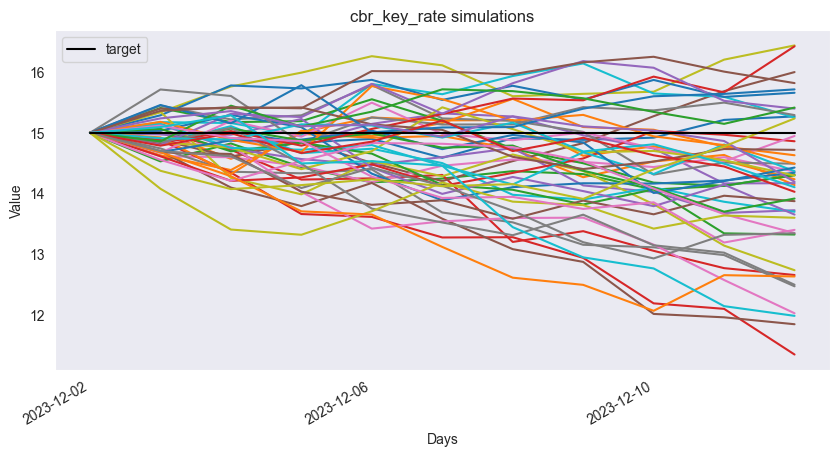

In [22]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations['cbr_key_rate'],
    risk_factor='cbr_key_rate',
)

date
2023-12-02    8.852611
2023-12-03    8.852611
2023-12-04    9.009900
2023-12-05    9.175515
2023-12-06    9.216675
2023-12-07    9.411970
2023-12-08    9.538778
2023-12-09    9.538778
2023-12-10    9.538778
2023-12-11    9.576488
2023-12-12    9.878997
Name: pca_cbd, dtype: float64


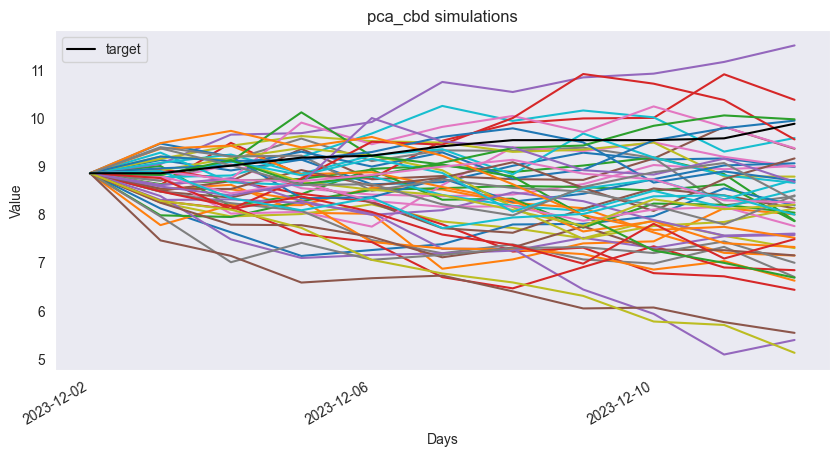

In [23]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations['pca_cbd'],
    risk_factor='pca_cbd',
)

date
2023-12-02    88.5819
2023-12-03    88.5819
2023-12-04    89.7619
2023-12-05    90.6728
2023-12-06    91.5823
2023-12-07    92.7826
2023-12-08    92.5654
2023-12-09    92.5654
2023-12-10    92.5654
2023-12-11    91.6402
2023-12-12    90.9846
Name: usd_rub, dtype: float64


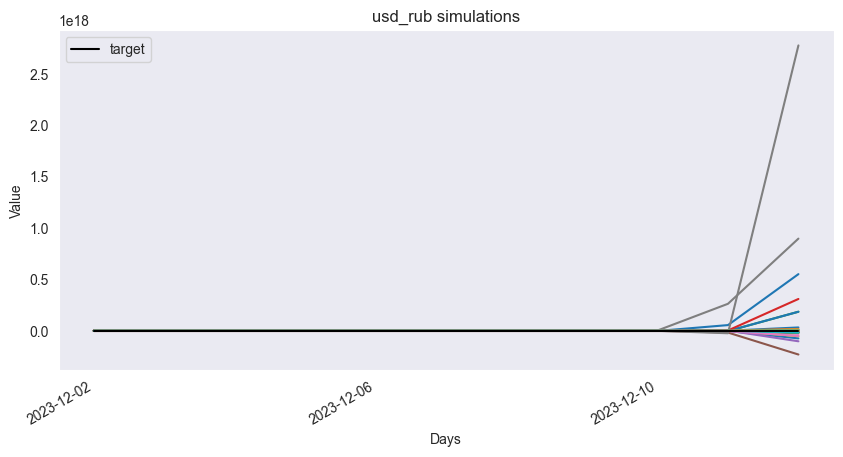

In [24]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations['usd_rub'],
    risk_factor='usd_rub',
)

In [16]:
portfolio.risk_factors.plot_simulations(
    simulations=simulations['eur_rub'],
    risk_factor='eur_rub',
)

KeyError: 'eur_rub'

### Fair value risk metrics

1 day prediction

In [ ]:
fvalue_dist = portfolio.simulate_fair_value_dist(
    n_days=1,
    n_sim=1_000,
)

In [ ]:
level = 99
var = calc_var(fvalue_dist, level=level)
print(f"VaR {level}%: {var:_.2f}")

In [ ]:
level = 97.5
es = calc_es(fvalue_dist, level=level)
print(f"Expected Shortfall {level}%: {es:_.2f}")

10 days prediction

In [ ]:
fvalue_dist = portfolio.simulate_fair_value_dist(
    n_days=10,
    n_sim=1_000,
)

In [ ]:
level = 99
var = calc_var(fvalue_dist, level=level)
print(f"VaR {level}%: {var:_.2f}")

In [ ]:
level = 97.5
es = calc_es(fvalue_dist, level=level)
print(f"Expected Shortfall {level}%: {es:_.2f}")